### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

In [87]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


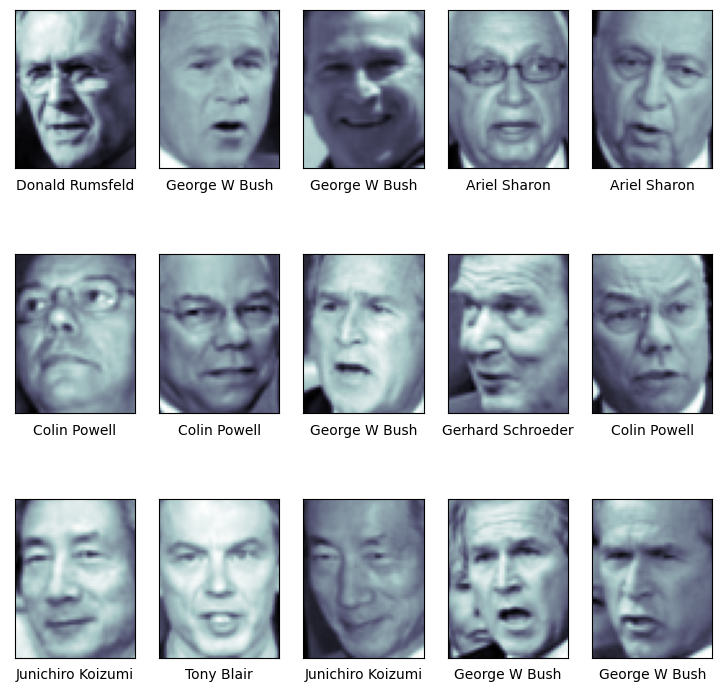

In [88]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [89]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

In [90]:
svc = SVC(kernel='linear')

model = make_pipeline(pca, svc)

In [91]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 15 s
Wall time: 10.4 s
{'svc__C': 1}


In [93]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

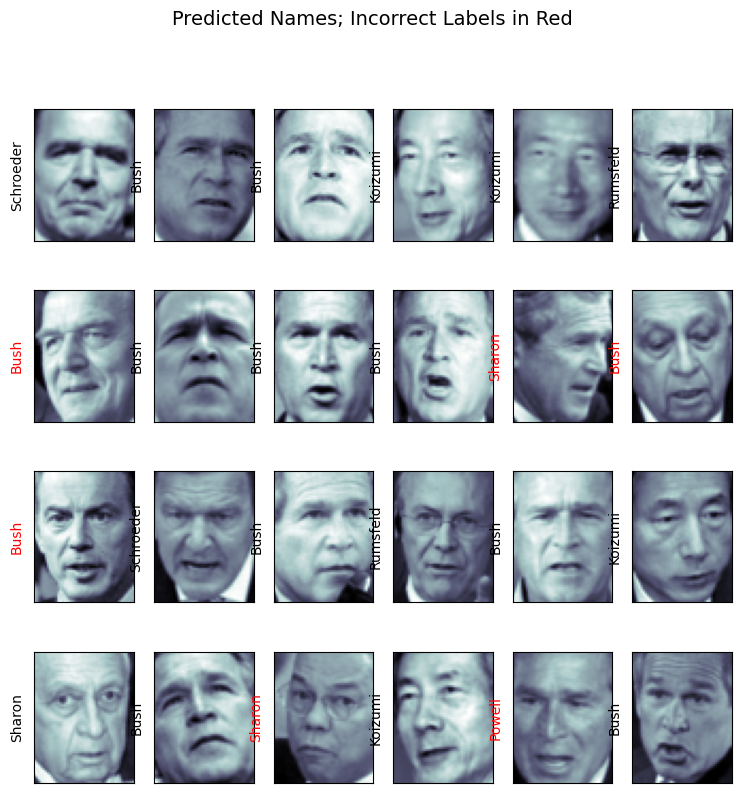

In [94]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [95]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.29      0.38      0.33        13
     Colin Powell       0.68      0.73      0.70        66
  Donald Rumsfeld       0.81      0.57      0.67        30
    George W Bush       0.79      0.83      0.81       139
Gerhard Schroeder       0.88      0.62      0.73        24
Junichiro Koizumi       0.71      0.88      0.79        17
       Tony Blair       0.78      0.68      0.72        31

         accuracy                           0.74       320
        macro avg       0.71      0.67      0.68       320
     weighted avg       0.75      0.74      0.74       320



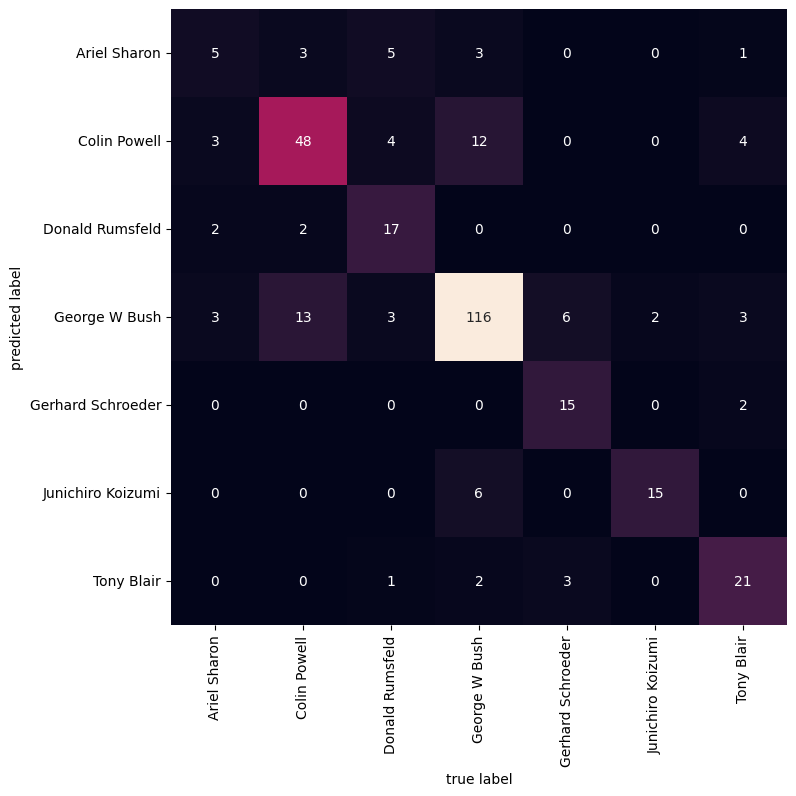

In [96]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.740625

In [98]:
svc = SVC(kernel='poly')

model = make_pipeline(pca, svc)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

model = grid.best_estimator_

yfit = model.predict(Xtest)

CPU times: total: 14 s
Wall time: 9.97 s
{'svc__C': 50}


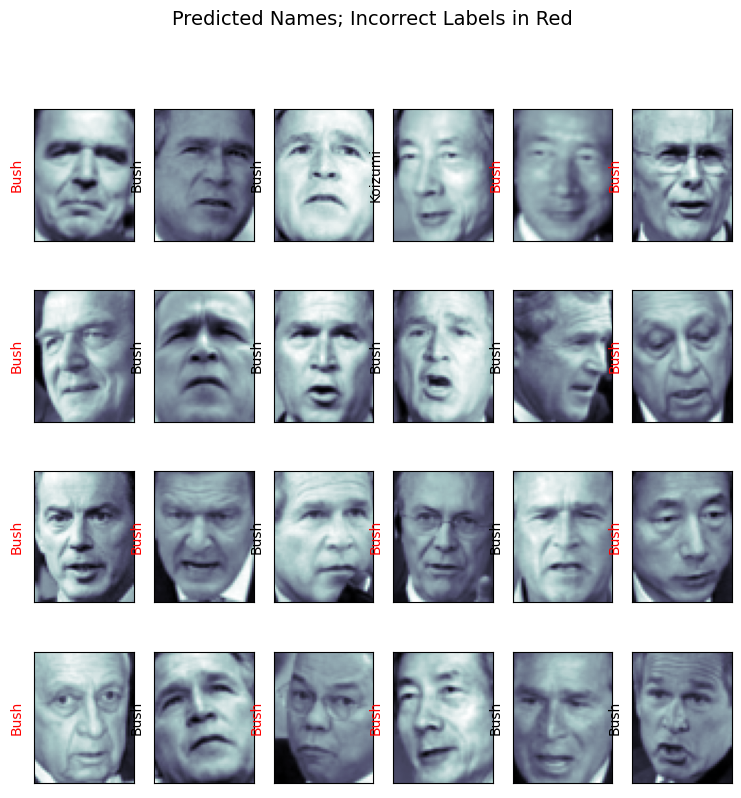

In [99]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.08      0.14        13
     Colin Powell       1.00      0.12      0.22        66
  Donald Rumsfeld       0.50      0.03      0.06        30
    George W Bush       0.46      0.99      0.63       139
Gerhard Schroeder       1.00      0.04      0.08        24
Junichiro Koizumi       1.00      0.24      0.38        17
       Tony Blair       1.00      0.10      0.18        31

         accuracy                           0.49       320
        macro avg       0.85      0.23      0.24       320
     weighted avg       0.72      0.49      0.37       320



0.4875

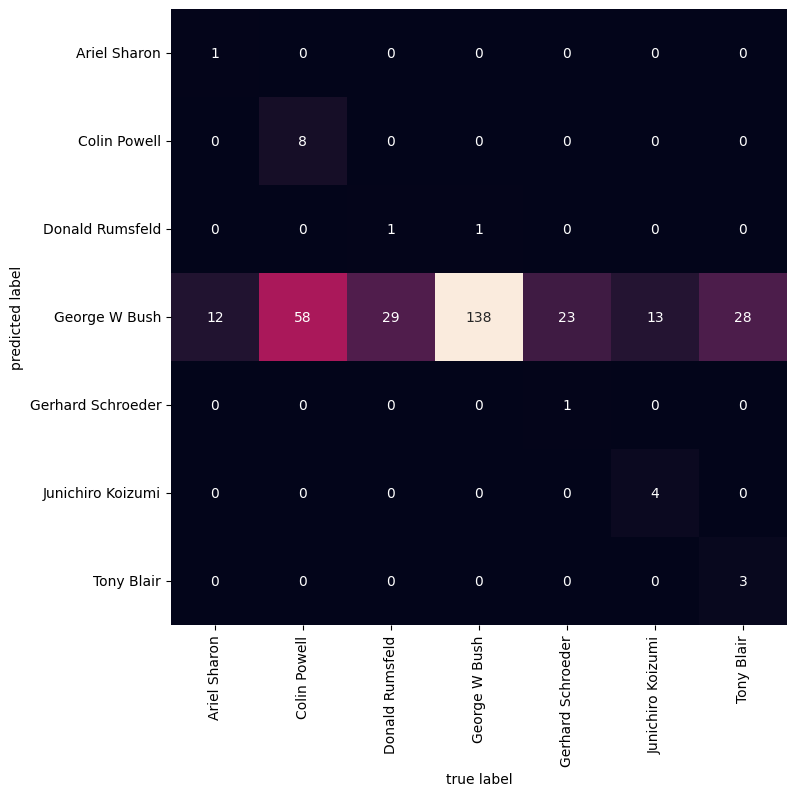

In [100]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

In [101]:
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

model = grid.best_estimator_

yfit = model.predict(Xtest)

CPU times: total: 13.8 s
Wall time: 9.32 s
{'svc__C': 5}


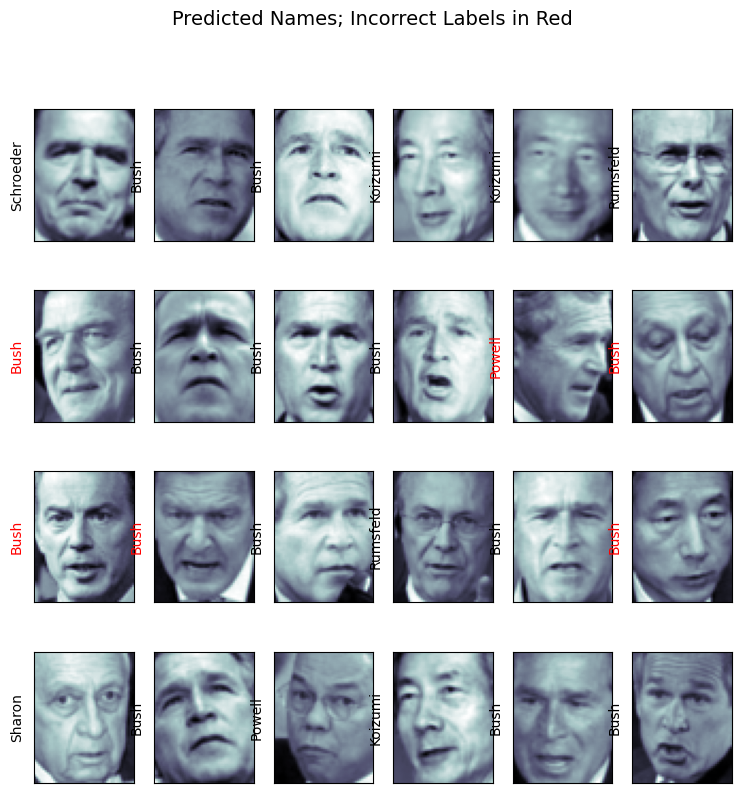

In [102]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.38      0.56        13
     Colin Powell       0.79      0.86      0.83        66
  Donald Rumsfeld       1.00      0.57      0.72        30
    George W Bush       0.76      0.96      0.85       139
Gerhard Schroeder       1.00      0.62      0.77        24
Junichiro Koizumi       1.00      0.65      0.79        17
       Tony Blair       1.00      0.77      0.87        31

         accuracy                           0.82       320
        macro avg       0.94      0.69      0.77       320
     weighted avg       0.85      0.82      0.81       320



0.821875

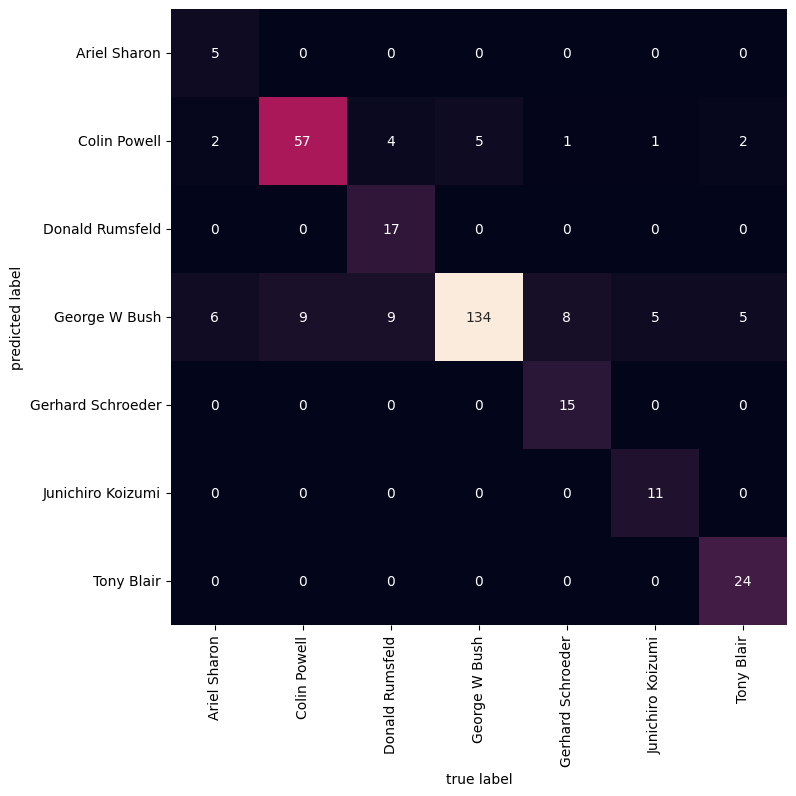

In [103]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

In [104]:
svc = SVC(kernel='sigmoid')

model = make_pipeline(pca, svc)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

model = grid.best_estimator_

yfit = model.predict(Xtest)

CPU times: total: 13.7 s
Wall time: 7.95 s
{'svc__C': 1}


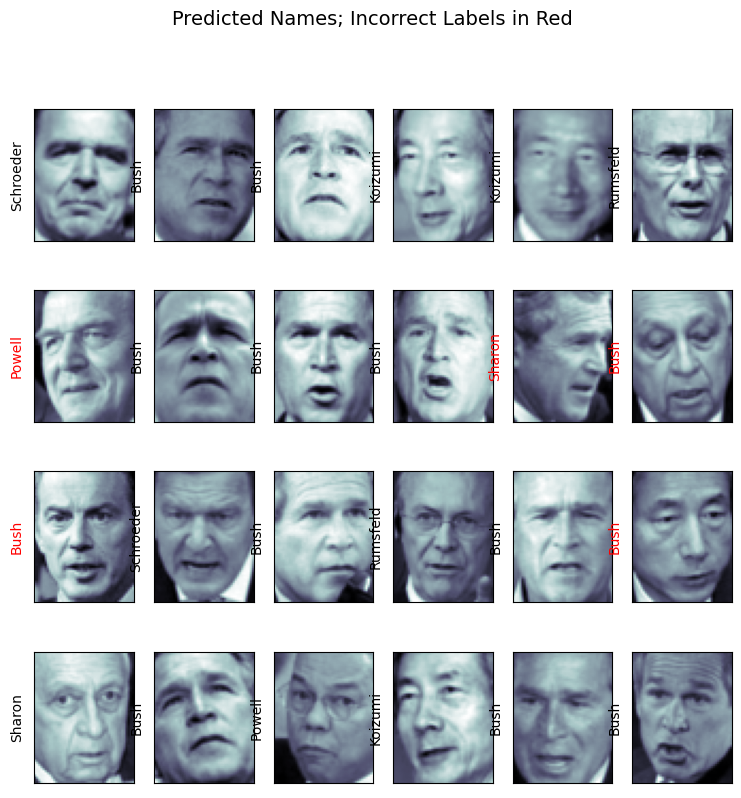

In [105]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

                   precision    recall  f1-score   support

     Ariel Sharon       0.44      0.31      0.36        13
     Colin Powell       0.73      0.73      0.73        66
  Donald Rumsfeld       0.75      0.50      0.60        30
    George W Bush       0.76      0.93      0.84       139
Gerhard Schroeder       0.89      0.71      0.79        24
Junichiro Koizumi       0.88      0.82      0.85        17
       Tony Blair       0.90      0.61      0.73        31

         accuracy                           0.77       320
        macro avg       0.77      0.66      0.70       320
     weighted avg       0.77      0.77      0.76       320



0.76875

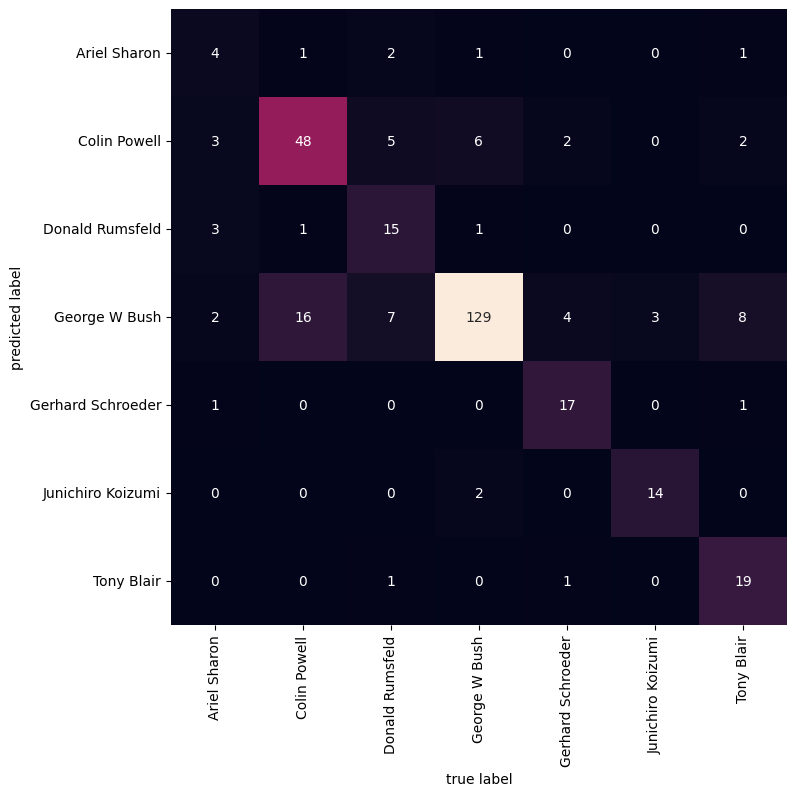

In [106]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

In [107]:
#наибольшую точность дает rbf, sigmoid примерно как linear, хуже всего результат у poly

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [108]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

lr = LogisticRegression(random_state=13, class_weight='balanced')
model = make_pipeline(pca, lr)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)



CPU times: total: 21.7 s
Wall time: 13.1 s
{'logisticregression__C': 0.01}


In [109]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

print(f"Linear model accuracy: {accuracy_score(yfit, ytest):.2f}")


Linear model accuracy: 0.82


### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них. 

In [128]:
import pandas as pd

data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [129]:
print(data['type'].unique())

data['type'] = data['type'].apply(lambda x: float(1) if x == 'white' else float(0))

['white' 'red']


<AxesSubplot:>

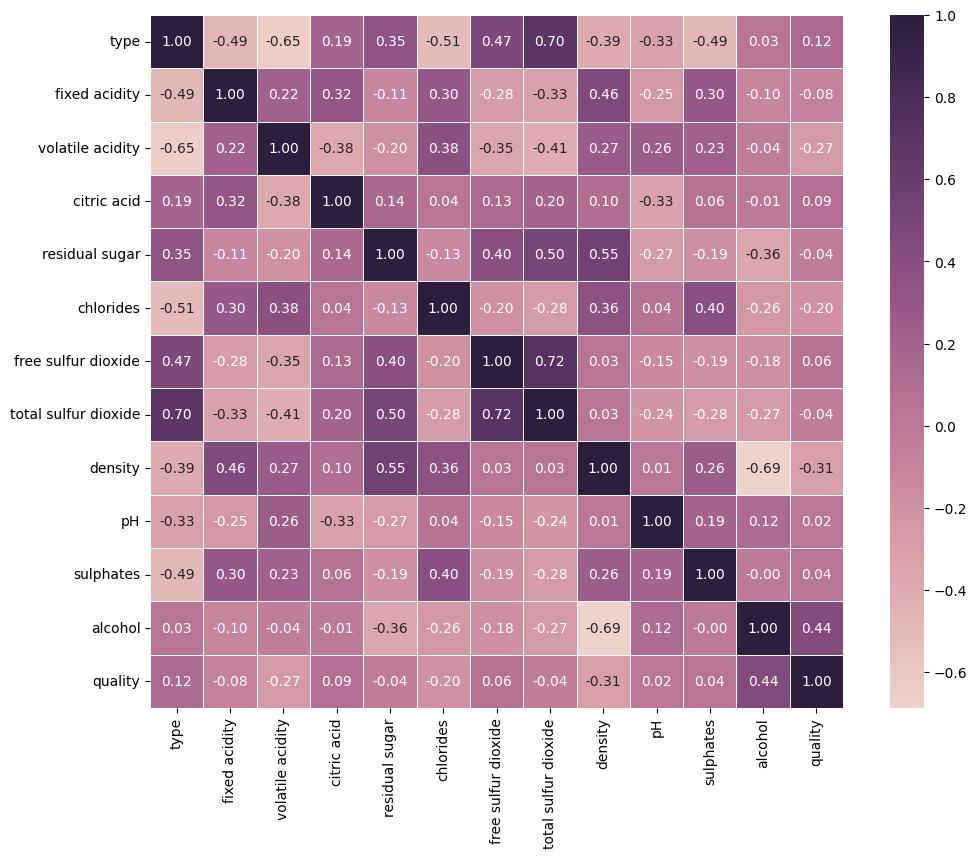

In [130]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.cubehelix_palette(as_cmap=True), square=True)

In [131]:
data.drop('pH', axis=1, inplace=True)
data.drop('total sulfur dioxide', axis=1, inplace=True)
data.drop('residual sugar', axis=1, inplace=True)
data.drop('sulphates', axis=1, inplace=True)

In [132]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 6497 non-null   float64
 1   fixed acidity        6487 non-null   float64
 2   volatile acidity     6489 non-null   float64
 3   citric acid          6494 non-null   float64
 4   chlorides            6495 non-null   float64
 5   free sulfur dioxide  6497 non-null   float64
 6   density              6497 non-null   float64
 7   alcohol              6497 non-null   float64
 8   quality              6497 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 456.9 KB


In [133]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

data = data.dropna(0)


fixed acidity       0.153917
volatile acidity    0.123134
citric acid         0.046175
chlorides           0.030783
dtype: float64 %


C:\Users\Mariya\AppData\Local\Temp\ipykernel_8524\3746192448.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = data.dropna(0)


In [134]:
print(data['quality'].unique())

data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6  else -1)
data.head()

[6 5 7 8 4 3 9]


,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol,quality
0,1.0,7.0,0.27,0.36,0.045,45.0,1.0010,8.8,1
1,1.0,6.3,0.30,0.34,0.049,14.0,0.9940,9.5,1
2,1.0,8.1,0.28,0.40,0.050,30.0,0.9951,10.1,1
3,1.0,7.2,0.23,0.32,0.058,47.0,0.9956,9.9,1
4,1.0,7.2,0.23,0.32,0.058,47.0,0.9956,9.9,1


In [135]:
y = data['quality']
X = data[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']]
X.head()

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol
0,1.0,7.0,0.27,0.36,0.045,45.0,1.0010,8.8
1,1.0,6.3,0.30,0.34,0.049,14.0,0.9940,9.5
2,1.0,8.1,0.28,0.40,0.050,30.0,0.9951,10.1
3,1.0,7.2,0.23,0.32,0.058,47.0,0.9956,9.9
4,1.0,7.2,0.23,0.32,0.058,47.0,0.9956,9.9


In [136]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)


In [137]:
def plotting(grid, params):
    scores_mean = grid.cv_results_['mean_test_score']
    scores_sd = grid.cv_results_['std_test_score']

    fig, ax = plt.subplots()
    ax.plot(params,scores_mean)
    ax.fill_between(params, (scores_mean-scores_sd), (scores_mean+scores_sd), color='g', alpha=.1)

In [138]:
def model_train(model, param_grid, hyperparams):
    grid = GridSearchCV(model, param_grid, scoring='roc_auc')
    grid.fit(Xtrain, ytrain)
    plotting(grid, hyperparams)
    print(f'Best params: {grid.best_params_}')
    best = grid.best_estimator_
    y_pred_train = best.predict(Xtrain)
    y_pred_test = best.predict(Xtest)
    print(classification_report(ytrain, y_pred_train), classification_report(ytest, y_pred_test))
    print(roc_auc_score(ytrain, y_pred_train), roc_auc_score(ytest, y_pred_test))

In [141]:
model = SGDClassifier()
hyperparams = ['hinge', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'loss': hyperparams}

SGD results
Best params: {'loss': 'hinge'}
              precision    recall  f1-score   support

          -1       0.67      0.31      0.42      1786
           1       0.69      0.91      0.79      3070

    accuracy                           0.69      4856
   macro avg       0.68      0.61      0.60      4856
weighted avg       0.68      0.69      0.65      4856
               precision    recall  f1-score   support

          -1       0.65      0.29      0.40       589
           1       0.69      0.91      0.79      1030

    accuracy                           0.68      1619
   macro avg       0.67      0.60      0.59      1619
weighted avg       0.68      0.68      0.65      1619

0.6092073346440465 0.5994107175235301


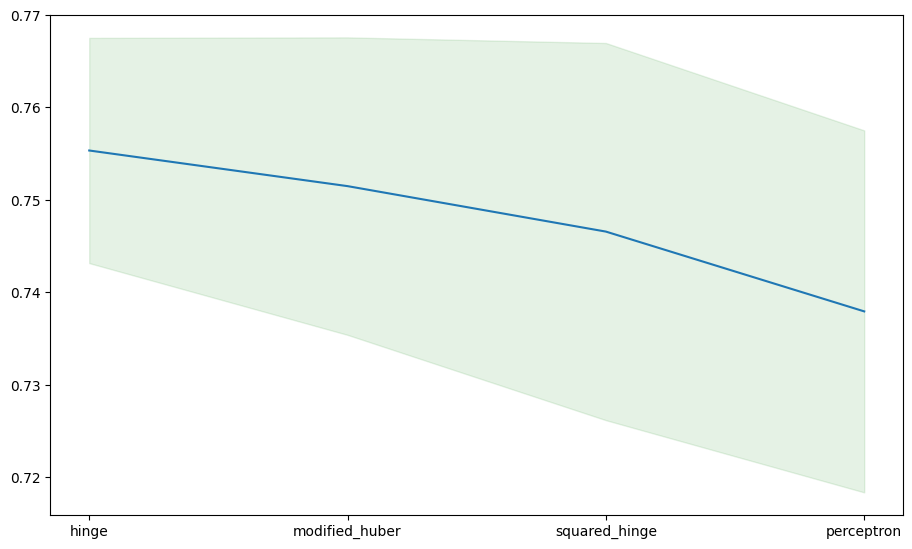

In [142]:
print('SGD results')
model_train(model, param_grid, hyperparams)

In [145]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('sgd', SGDClassifier())
])
hyperparams = ['hinge', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'sgd__loss': hyperparams}

Normalised SGD results
Best params: {'sgd__loss': 'modified_huber'}
              precision    recall  f1-score   support

          -1       0.57      0.70      0.63      1786
           1       0.80      0.69      0.74      3070

    accuracy                           0.70      4856
   macro avg       0.69      0.70      0.69      4856
weighted avg       0.72      0.70      0.70      4856
               precision    recall  f1-score   support

          -1       0.57      0.67      0.62       589
           1       0.79      0.72      0.75      1030

    accuracy                           0.70      1619
   macro avg       0.68      0.69      0.68      1619
weighted avg       0.71      0.70      0.70      1619

0.6975265455898392 0.6913832891028071


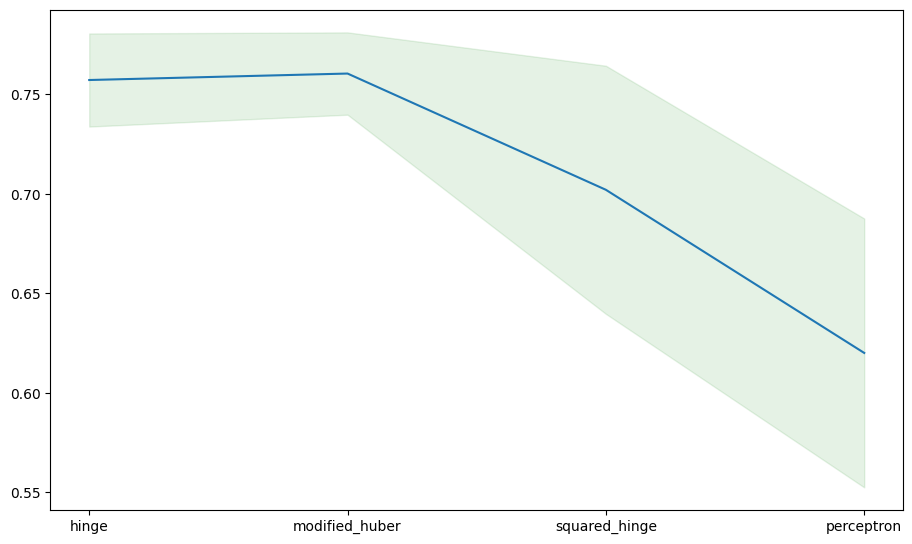

In [146]:
print('Normalised SGD results')
model_train(model, param_grid, hyperparams)

In [161]:
model = KNeighborsClassifier()
hyperparams = list(range(2, 30))
param_grid = {'n_neighbors': hyperparams}

KNN results
Best params: {'n_neighbors': 26}
              precision    recall  f1-score   support

          -1       0.66      0.60      0.63      1786
           1       0.78      0.82      0.80      3070

    accuracy                           0.74      4856
   macro avg       0.72      0.71      0.72      4856
weighted avg       0.74      0.74      0.74      4856
               precision    recall  f1-score   support

          -1       0.61      0.57      0.59       589
           1       0.76      0.79      0.77      1030

    accuracy                           0.71      1619
   macro avg       0.68      0.68      0.68      1619
weighted avg       0.70      0.71      0.71      1619

0.7109271897603875 0.6777061664496349


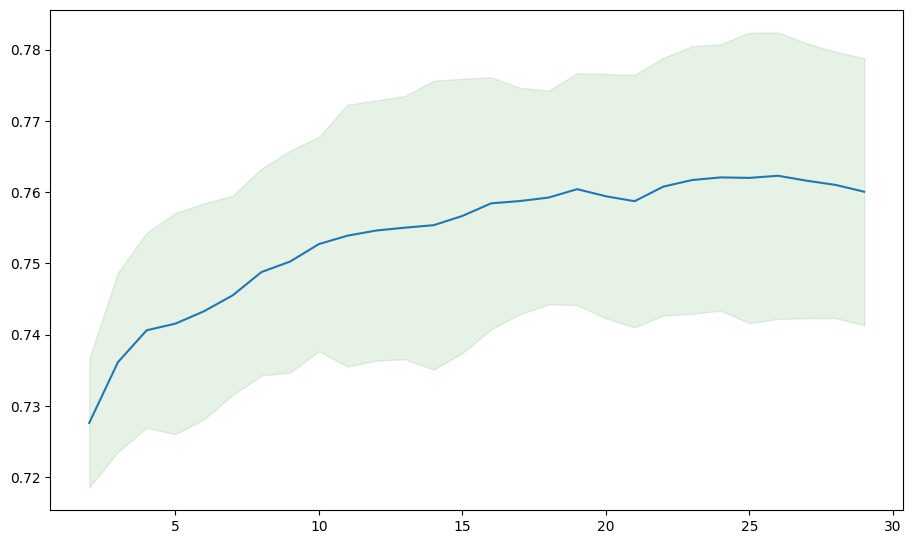

In [162]:
print('KNN results')
model_train(model, param_grid, hyperparams)

In [163]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
make_pipeline(pca, model)
'kneighborsclassifier__n_neighbors'
hyperparams = list(range(2, 30))
param_grid = {'knn__n_neighbors': hyperparams}

Normalised KNN results
Best params: {'knn__n_neighbors': 29}
              precision    recall  f1-score   support

          -1       0.72      0.62      0.66      1786
           1       0.79      0.86      0.83      3070

    accuracy                           0.77      4856
   macro avg       0.76      0.74      0.74      4856
weighted avg       0.77      0.77      0.77      4856
               precision    recall  f1-score   support

          -1       0.68      0.54      0.60       589
           1       0.77      0.85      0.81      1030

    accuracy                           0.74      1619
   macro avg       0.72      0.70      0.70      1619
weighted avg       0.73      0.74      0.73      1619

0.737709510452269 0.6968895775297937


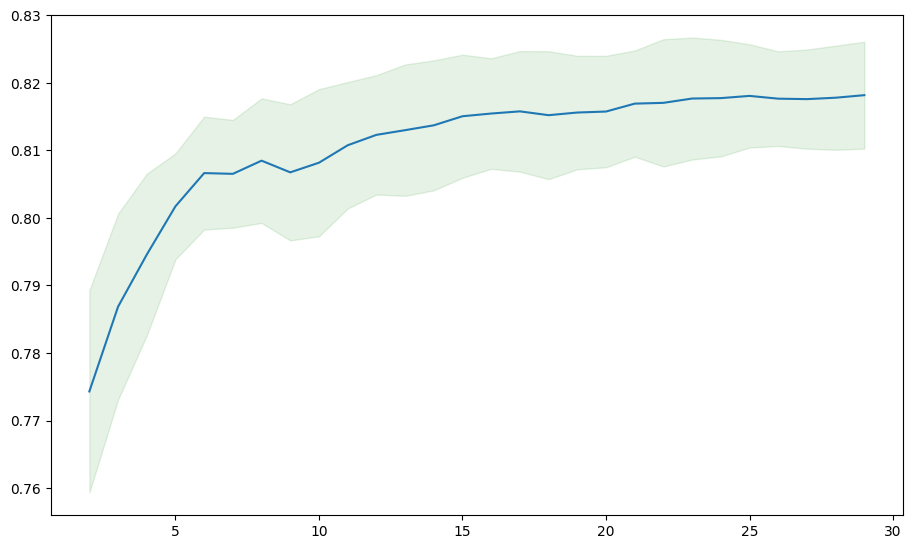

In [164]:
print('Normalised KNN results')
model_train(model, param_grid, hyperparams)